In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [3]:
#讀資料
rawdataAll = pd.read_excel('data/hour30days.xlsx')
#rawdataAll.head()
preProcDataAll = rawdataAll.dropna(axis='rows', how='any')

print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll.shape))


before:(742, 25)
after:(489, 25)


In [4]:
feature_names = preProcDataAll.columns
df = preProcDataAll[feature_names]
raw_feature = df[:-1]
raw_target = df['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]


In [5]:
print(raw_target.shape)
print(raw_feature.shape)


(488,)
(488, 25)


In [6]:
X_train, X_test,Y_train, Y_test = train_test_split(
    raw_feature, raw_target, test_size=0.25, random_state=5)

In [7]:
print("X_train:"+str(X_train.shape))
print("X_test:"+str(X_test.shape))
print("Y_train:"+str(Y_train.shape))
print("Y_test:"+str(Y_test.shape))

X_train:(366, 25)
X_test:(122, 25)
Y_train:(366,)
Y_test:(122,)


In [8]:
feature = X_train
target = Y_train


In [9]:
#建立模型
lm = LinearRegression()
X = feature
Y = target
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
#model 3
lm3 = LinearRegression(normalize=True)
X3 = feature
Y3 = target
lm3.fit(X3,Y3)
print('coef is:',lm3.coef_)
print('intercept is:',lm3.intercept_)
#pd.DataFrame( list(zip(X.columns, lm3.coef_)) , columns = ['feature','estimatedCoefficients'])
mse3 = np.mean( (Y_test - lm3.predict(X_test))**2 )
print(mse3)

coef is: [ 4.25140554e-01  6.31225525e-03 -8.18043724e-03  6.55338507e-02
 -5.72867224e-02  1.97381992e-03  1.10463450e-03  1.08967010e-01
 -1.76550015e-01  2.47959166e-03  9.71417987e-01  2.60340011e-02
  3.11941658e-03  4.73423591e-03 -8.86350297e-01  1.32702697e-01
 -1.50628282e-01  1.37799813e-03  1.76028637e-03  4.57837364e-01
 -6.16736051e-01  1.12803948e-03  3.35095375e-04  9.26397420e-02
  4.46372107e-02]
intercept is: -0.17020979616347276
21.34724399528972


In [11]:
print('coef is:',lm.coef_)
print('intercept is:',lm.intercept_)

coef is: [ 4.25140554e-01  6.31225525e-03 -8.18043724e-03  6.55338507e-02
 -5.72867224e-02  1.97381992e-03  1.10463450e-03  1.08967010e-01
 -1.76550015e-01  2.47959166e-03  9.71417987e-01  2.60340011e-02
  3.11941658e-03  4.73423591e-03 -8.86350297e-01  1.32702697e-01
 -1.50628282e-01  1.37799813e-03  1.76028637e-03  4.57837364e-01
 -6.16736051e-01  1.12803948e-03  3.35095375e-04  9.26397420e-02
  4.46372107e-02]
intercept is: -0.1702097961634692


In [12]:
mse = np.mean( (Y_test - lm.predict(X_test))**2 )
print(mse)

21.347243995289745


In [13]:
#把每一項的係數打包成dataframe
pd.DataFrame( list(zip(X.columns, lm.coef_)) , columns = ['feature','estimatedCoefficients'])

,feature,estimatedCoefficients
0,中山區中山風速 WIND_SPEED (m/sec),0.425141
1,中山區中山風向 WIND_DIREC (degrees),0.006312
2,中山區中山溫度 AMB_TEMP (℃),-0.008180
3,中山區中山細懸浮微粒 PM 2.5 (μg/m 3 ),0.065534
4,北投區陽明風速 WIND_SPEED (m/sec),-0.057287
5,北投區陽明風向 WIND_DIREC (degrees),0.001974
6,北投區陽明溫度 AMB_TEMP (℃),0.001105
7,北投區陽明細懸浮微粒 PM 2.5 (μg/m 3 ),0.108967
8,北投區士林風速 WIND_SPEED (m/sec),-0.176550
9,北投區士林風向 WIND_DIREC (degrees),0.002480


In [14]:
lm.predict(X[:5])

array([43.05041339, 10.27048245, 14.40385148,  7.59445058, 26.6581778 ])

In [15]:
lm.predict(X_test[:5])

array([18.64993851, 20.3658001 , 11.54188109, 50.40425352, 15.56355111])

In [16]:
lm.score(X,Y)

0.8521525638301419

In [17]:

import requests
import random

rand = random.randrange(0, len(X_test), 1)
print('index:'+str(rand))
predictData = X_test.iloc[rand:rand+1] 
#print(predictData)
answer = lm.predict(predictData)
answer = int(answer) 
print('predict is:'+str(answer))
answer = str(answer)
path='https://maker.ifttt.com/trigger/noticePM25/with/key/{your_key}'
body={
    'value1':' 松山區 ',
    'value2':answer,
    'value3':''
}
r = requests.post(path, data =body)
print(r.text)

index:33
predict is:15
Congratulations! You've fired the noticePM25 event


In [18]:
# fill 0
preProcDataAll_fill0 = rawdataAll.fillna(0)
print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll_fill0.shape))
#fill 0
feature_names = preProcDataAll_fill0.columns
df2 = preProcDataAll_fill0[feature_names]
raw_feature2 = df2[:-1]
raw_target2 = df2['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]
#fill 0
X2_train, X2_test,Y2_train, Y2_test = train_test_split(
    raw_feature2, raw_target2, test_size=0.25, random_state=5)

print("X_train:"+str(X2_train.shape))
print("X_test:"+str(X2_test.shape))
print("Y_train:"+str(Y2_train.shape))
print("Y_test:"+str(Y2_test.shape))
# fill 0
feature2 = X2_train
target2 = Y2_train
#target.head()
#feature.head()
lm2 = LinearRegression()
X2 = feature2
Y2 = target2
lm2.fit(X2,Y2)
print('intercept is:',lm.intercept_)
pd.DataFrame( list(zip(X2.columns, lm2.coef_)) , columns = ['feature','estimatedCoefficients'])
mse2 = np.mean( (Y2_test - lm2.predict(X2_test))**2 )
print('mse2 is:'+str(mse2))


before:(742, 25)
after:(742, 25)
X_train:(555, 25)
X_test:(186, 25)
Y_train:(555,)
Y_test:(186,)
intercept is: -0.1702097961634692
mse2 is:22.762265960179864


(122,)


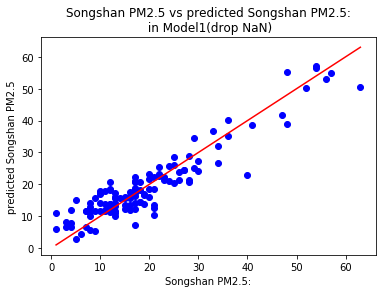

In [25]:
# 實際vs預測
print(Y_test.shape)
plt.scatter(Y_test, lm.predict(X_test), c='b')
plt.xlabel('Songshan PM2.5:')
plt.ylabel('predicted Songshan PM2.5')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r')
plt.title('Songshan PM2.5 vs predicted Songshan PM2.5:\n in Model1(drop NaN)')
plt.show()

(186,)


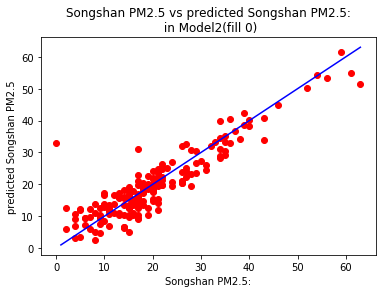

In [26]:
print(Y2_test.shape)
plt.scatter(Y2_test, lm2.predict(X2_test), c='r')
plt.xlabel('Songshan PM2.5:')
plt.ylabel('predicted Songshan PM2.5')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b')
plt.title('Songshan PM2.5 vs predicted Songshan PM2.5:\n in Model2(fill 0)')
plt.show()

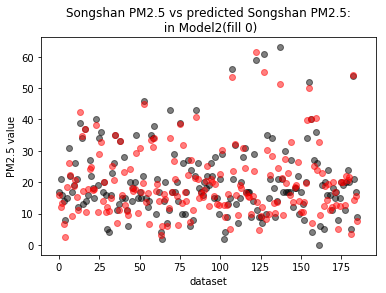

In [338]:
#原始資料vs實際
plt.scatter(range(len(Y2_test)), Y2_test, c='k', alpha=0.5)
plt.xlabel('dataset')
plt.ylabel('PM2.5 value')
plt.title('Songshan PM2.5 vs predicted Songshan PM2.5:\n in Model2(fill 0)')
plt.show()

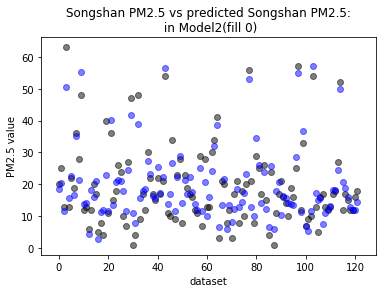

In [340]:
plt.scatter(range(len(Y_test)), Y_test, c='k', alpha=0.5)
plt.scatter(range(len(Y_test)), lm.predict(X_test), c='b', alpha=0.5)
plt.xlabel('dataset')
plt.ylabel('PM2.5 value')
plt.title('Songshan PM2.5 vs predicted Songshan PM2.5:\n in Model2(fill 0)')
plt.show()